In [1]:
import pandas as pd
from utils import *

In [2]:
df = load_data()
# save df to csv
for i in range(1, 7):
    temp = df[df['condition'] == i]
    for index, row in temp.iterrows():
        for q in range(1, 21):
            temp.at[index, f'{q}_1'] = temp.at[index, f'{q}_1'] == temp.at[index, f'{q}_gt']
            temp.at[index, f'{q}_2'] = temp.at[index, f'{q}_2'] == temp.at[index, f'{q}_gt']
            temp.at[index, f'{q}_3'] = temp.at[index, f'{q}_3'] == temp.at[index, f'{q}_gt']
            temp.at[index, f'{q}_ai'] = temp.at[index, f'{q}_ai'] == temp.at[index, f'{q}_gt']
    temp.to_csv(f'condition_{i}_res.csv', index=False)

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted, x='Step', y='Value', order=col_names, ci='sd', capsize=0.1)


One-way ANOVA results:
F-statistic: 517.7646478408466
p-value: 5.594375285211009e-142

Tukey's HSD test results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    cc     cf  -10.037    0.0 -10.7744 -9.2996   True
    cc     fc  -9.4537    0.0 -10.1911 -8.7163   True
    cc     ff  -6.4352    0.0  -7.1726 -5.6978   True
    cf     fc   0.5833 0.1749  -0.1541  1.3207  False
    cf     ff   3.6019    0.0   2.8644  4.3393   True
    fc     ff   3.0185    0.0   2.2811  3.7559   True
-----------------------------------------------------


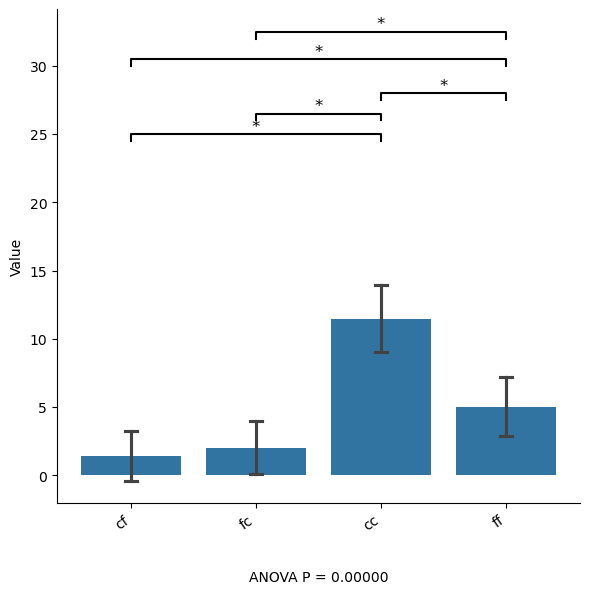

In [3]:
df = load_data()

data = {
    "cf": [],
    "fc": [],
    "cc": [],
    "ff": []
}

for index, row in df.iterrows():
    cf,fc,cc,ff = 0,0,0,0
    for i in range(1, 21):
        # step 1 is correct
        if row[f'{i}_1'] == row[f'{i}_gt']:
            if row[f'{i}_2'] == row[f'{i}_gt']:
                cc += 1
            else:
                cf += 1
        # step 1 is incorrect
        else:
            if row[f'{i}_2'] == row[f'{i}_gt']:
                fc += 1
            else:
                ff += 1

    data["cf"].append(cf)
    data["fc"].append(fc)
    data["cc"].append(cc)
    data["ff"].append(ff)

data = pd.DataFrame(data)
plot_bar(data)

In [4]:
df = load_data()

cf,fc,cc,ff = 0,0,0,0
cf_ai,fc_ai,cc_ai,ff_ai = 0,0,0,0
for index, row in df.iterrows():
    for i in range(1, 21):
        if row[f'{i}_ai'] != row[f'{i}_gt']:
            # step 1 is correct
            if row[f'{i}_1'] == row[f'{i}_gt']:
                if row[f'{i}_2'] == row[f'{i}_gt']:
                    cc += 1
                else:
                    cf += 1
            # step 1 is incorrect
            else:
                if row[f'{i}_2'] == row[f'{i}_gt']:
                    fc += 1
                else:
                    ff += 1
        # when AI is correct
        else:
            # step 1 is correct
            if row[f'{i}_1'] == row[f'{i}_gt']:
                if row[f'{i}_2'] == row[f'{i}_gt']:
                    cc_ai += 1
                else:
                    cf_ai += 1
            # step 1 is incorrect
            else:
                if row[f'{i}_2'] == row[f'{i}_gt']:
                    fc_ai += 1
                else:
                    ff_ai += 1

table = [[cf, fc],
         [cc, ff]]
from statsmodels.stats.contingency_tables import mcnemar
result = mcnemar(table, exact=True)
print("When AI suggestions is incorrect:")
print(f"table order [[cf, fc], [cc, ff]]")
print(table, result.pvalue)

table_ai = [[cf_ai, fc_ai],
         [cc_ai, ff_ai]]
from statsmodels.stats.contingency_tables import mcnemar
result_ai = mcnemar(table_ai, exact=True)
print("When AI suggestions is correct:")
print(f"table order [[cf, fc], [cc, ff]]")
print(table_ai, result_ai.pvalue)

# when AI is correct, f-c is significantly higher than c-f
# when AI is incorrect, f-c is significantly lower than c-f
# AI significantly influences the user's decision

When AI suggestions is incorrect:
table order [[cf, fc], [cc, ff]]
[[94, 19], [109, 264]] 1.555834315348132e-16
When AI suggestions is correct:
table order [[cf, fc], [cc, ff]]
[[62, 200], [1131, 281]] 6.4383221343551916e-158


In [5]:
df = load_data()

user_acc = {
    "hs": [],
    "college": [],
    "others": []
}

for index, row in df.iterrows():
    count = 0
    for i in range(1, 21):
        if row[f"{i}_ai"] != row[f"{i}_1"] and row[f"{i}_ai"] == row[f"{i}_2"]: count += 1
    if row['education'] in ['High school degree']:
        user_acc['hs'].append(count)
    elif row['education'] in ['College degree']:
        user_acc['college'].append(count)
    else:
        user_acc['others'].append(count)

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(user_acc['hs'], user_acc['college'])
print(f"F-value: {f_value}, p-value: {p_value}")

f_value, p_value = stats.f_oneway(user_acc['hs'], user_acc['others'])
print(f"F-value: {f_value}, p-value: {p_value}")

f_value, p_value = stats.f_oneway(user_acc['others'], user_acc['college'])
print(f"F-value: {f_value}, p-value: {p_value}")

# f_value, p_value = stats.ttest_rel(user_acc['familiar'], user_acc['unfamiliar'])
# print(f"F-value: {f_value}, p-value: {p_value}")

F-value: 1.1178639881602255, p-value: 0.29300488227789506
F-value: 6.031990281433488, p-value: 0.016773681825289165
F-value: 5.098733598384291, p-value: 0.028431645400197818


In [6]:
df = load_data()

user_acc = {
    "hs": [],
    "others": []
}

for index, row in df.iterrows():
    count = 0
    for i in range(1, 21):
        if row[f"{i}_ai"] != row[f"{i}_1"] and row[f"{i}_ai"] == row[f"{i}_2"]: count += 1
    if row['education'] in ['High school degree']:
        user_acc['hs'].append(count)
    else:
        user_acc['others'].append(count)

# Perform one-way ANOVA

f_value, p_value = stats.f_oneway(user_acc['hs'], user_acc['others'])
print(f"F-value: {f_value}, p-value: {p_value}")

# f_value, p_value = stats.ttest_rel(user_acc['familiar'], user_acc['unfamiliar'])
# print(f"F-value: {f_value}, p-value: {p_value}")

F-value: 0.07663622526636238, p-value: 0.7824478364598434
